# Data exploration and validation

## Load and inspect the dataset

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import seaborn as sns


path = kagglehub.dataset_download("patelris/crop-yield-prediction-dataset")
df = pd.read_csv(path + '/yield_df.csv')
df.head()

Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [35]:
df.describe()

Unnamed: 0          Year    hg/ha_yield  \
count  28242.000000  28242.000000   28242.000000   
mean   14120.500000   2001.544296   77053.332094   
std     8152.907488      7.051905   84956.612897   
min        0.000000   1990.000000      50.000000   
25%     7060.250000   1995.000000   19919.250000   
50%    14120.500000   2001.000000   38295.000000   
75%    21180.750000   2008.000000  104676.750000   
max    28241.000000   2013.000000  501412.000000   

       average_rain_fall_mm_per_year  pesticides_tonnes      avg_temp  
count                    28242.00000       28242.000000  28242.000000  
mean                      1149.05598       37076.909344     20.542627  
std                        709.81215       59958.784665      6.312051  
min                         51.00000           0.040000      1.300000  
25%                        593.00000        1702.000000     16.702500  
50%                       1083.00000       17529.440000     21.510000  
75%                       1668.00000       48687.880000     26.000000  
max                       3240.00000      367778.000000     30.650000

In [36]:
df.nunique()

Unnamed: 0                       28242
Area                               101
Item                                10
Year                                23
hg/ha_yield                      11514
average_rain_fall_mm_per_year      100
pesticides_tonnes                 1673
avg_temp                          1831
dtype: int64

### Column conversion

As we can see from the previous cells, there are categorical (`Area` and `Item`) and numerical columns. For the categorical values to be used corectly we need to convert them into numerical value (`OneHotEncoding` or `OrdinalEncoding`) to actually use them in prediction.

In [37]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

We remove the column `Unnamed: 0` as it encodes no useful information (just the row index)

## Analyze and visualize features

### Target variable

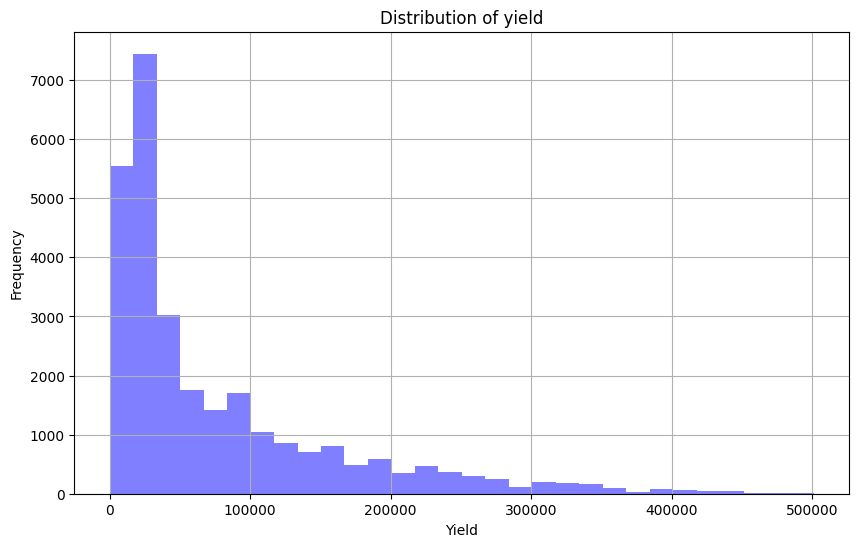

In [38]:
plt.figure(figsize=(10, 6))
df['hg/ha_yield'].hist(bins=30, alpha=.5, color='blue')
plt.title('Distribution of yield')
plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.show()

Distribution of yield appears to be **concentrated among lower values** and is not homogeneous.

---
### Numerical features

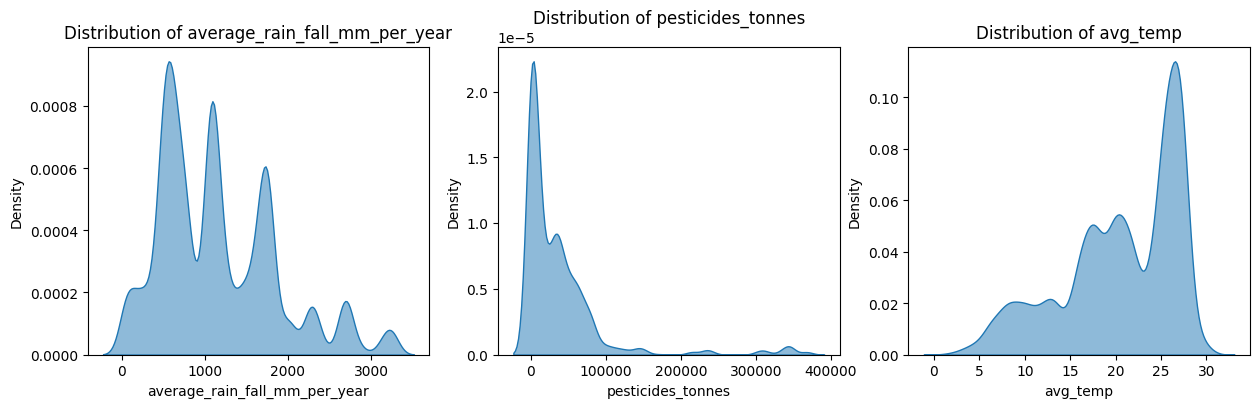

In [39]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
cols = ['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
for idx, col in enumerate(cols):
    sns.kdeplot(df[col], ax=axs[idx], fill=True, alpha=0.5)
    axs[idx].set_title('Distribution of ' + col)
plt.show()

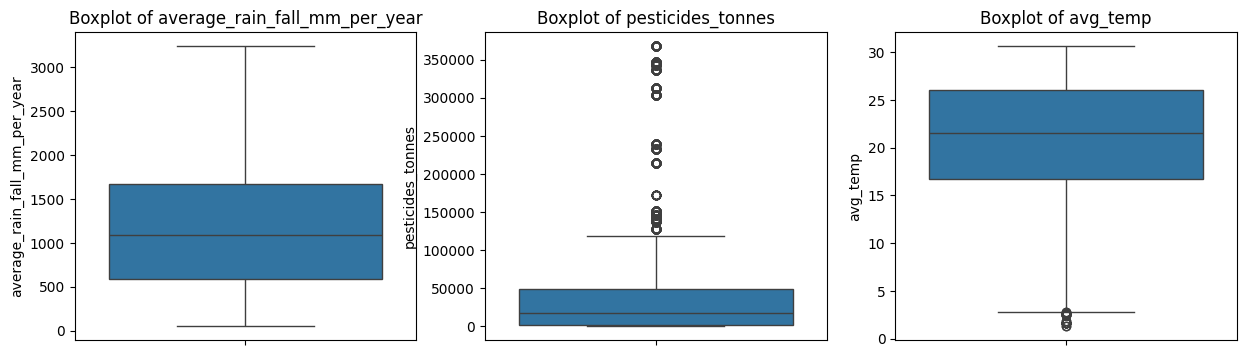

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

for idx, col in enumerate(cols):
    sns.boxplot(df[col], ax=axs[idx])
    axs[idx].set_title('Boxplot of ' + col)
plt.show()

Distribution of numerical variables is again **not homogeneous** as some of them have a higher density towards lower values (`pesticides_tonnes` and `avg_rain_fall_mm_per_year`) while others towards higher values (`avg_temp`).  
The boxplots show that pesticides data contains some outliers as well for the average temperature.

---
### Categorical features

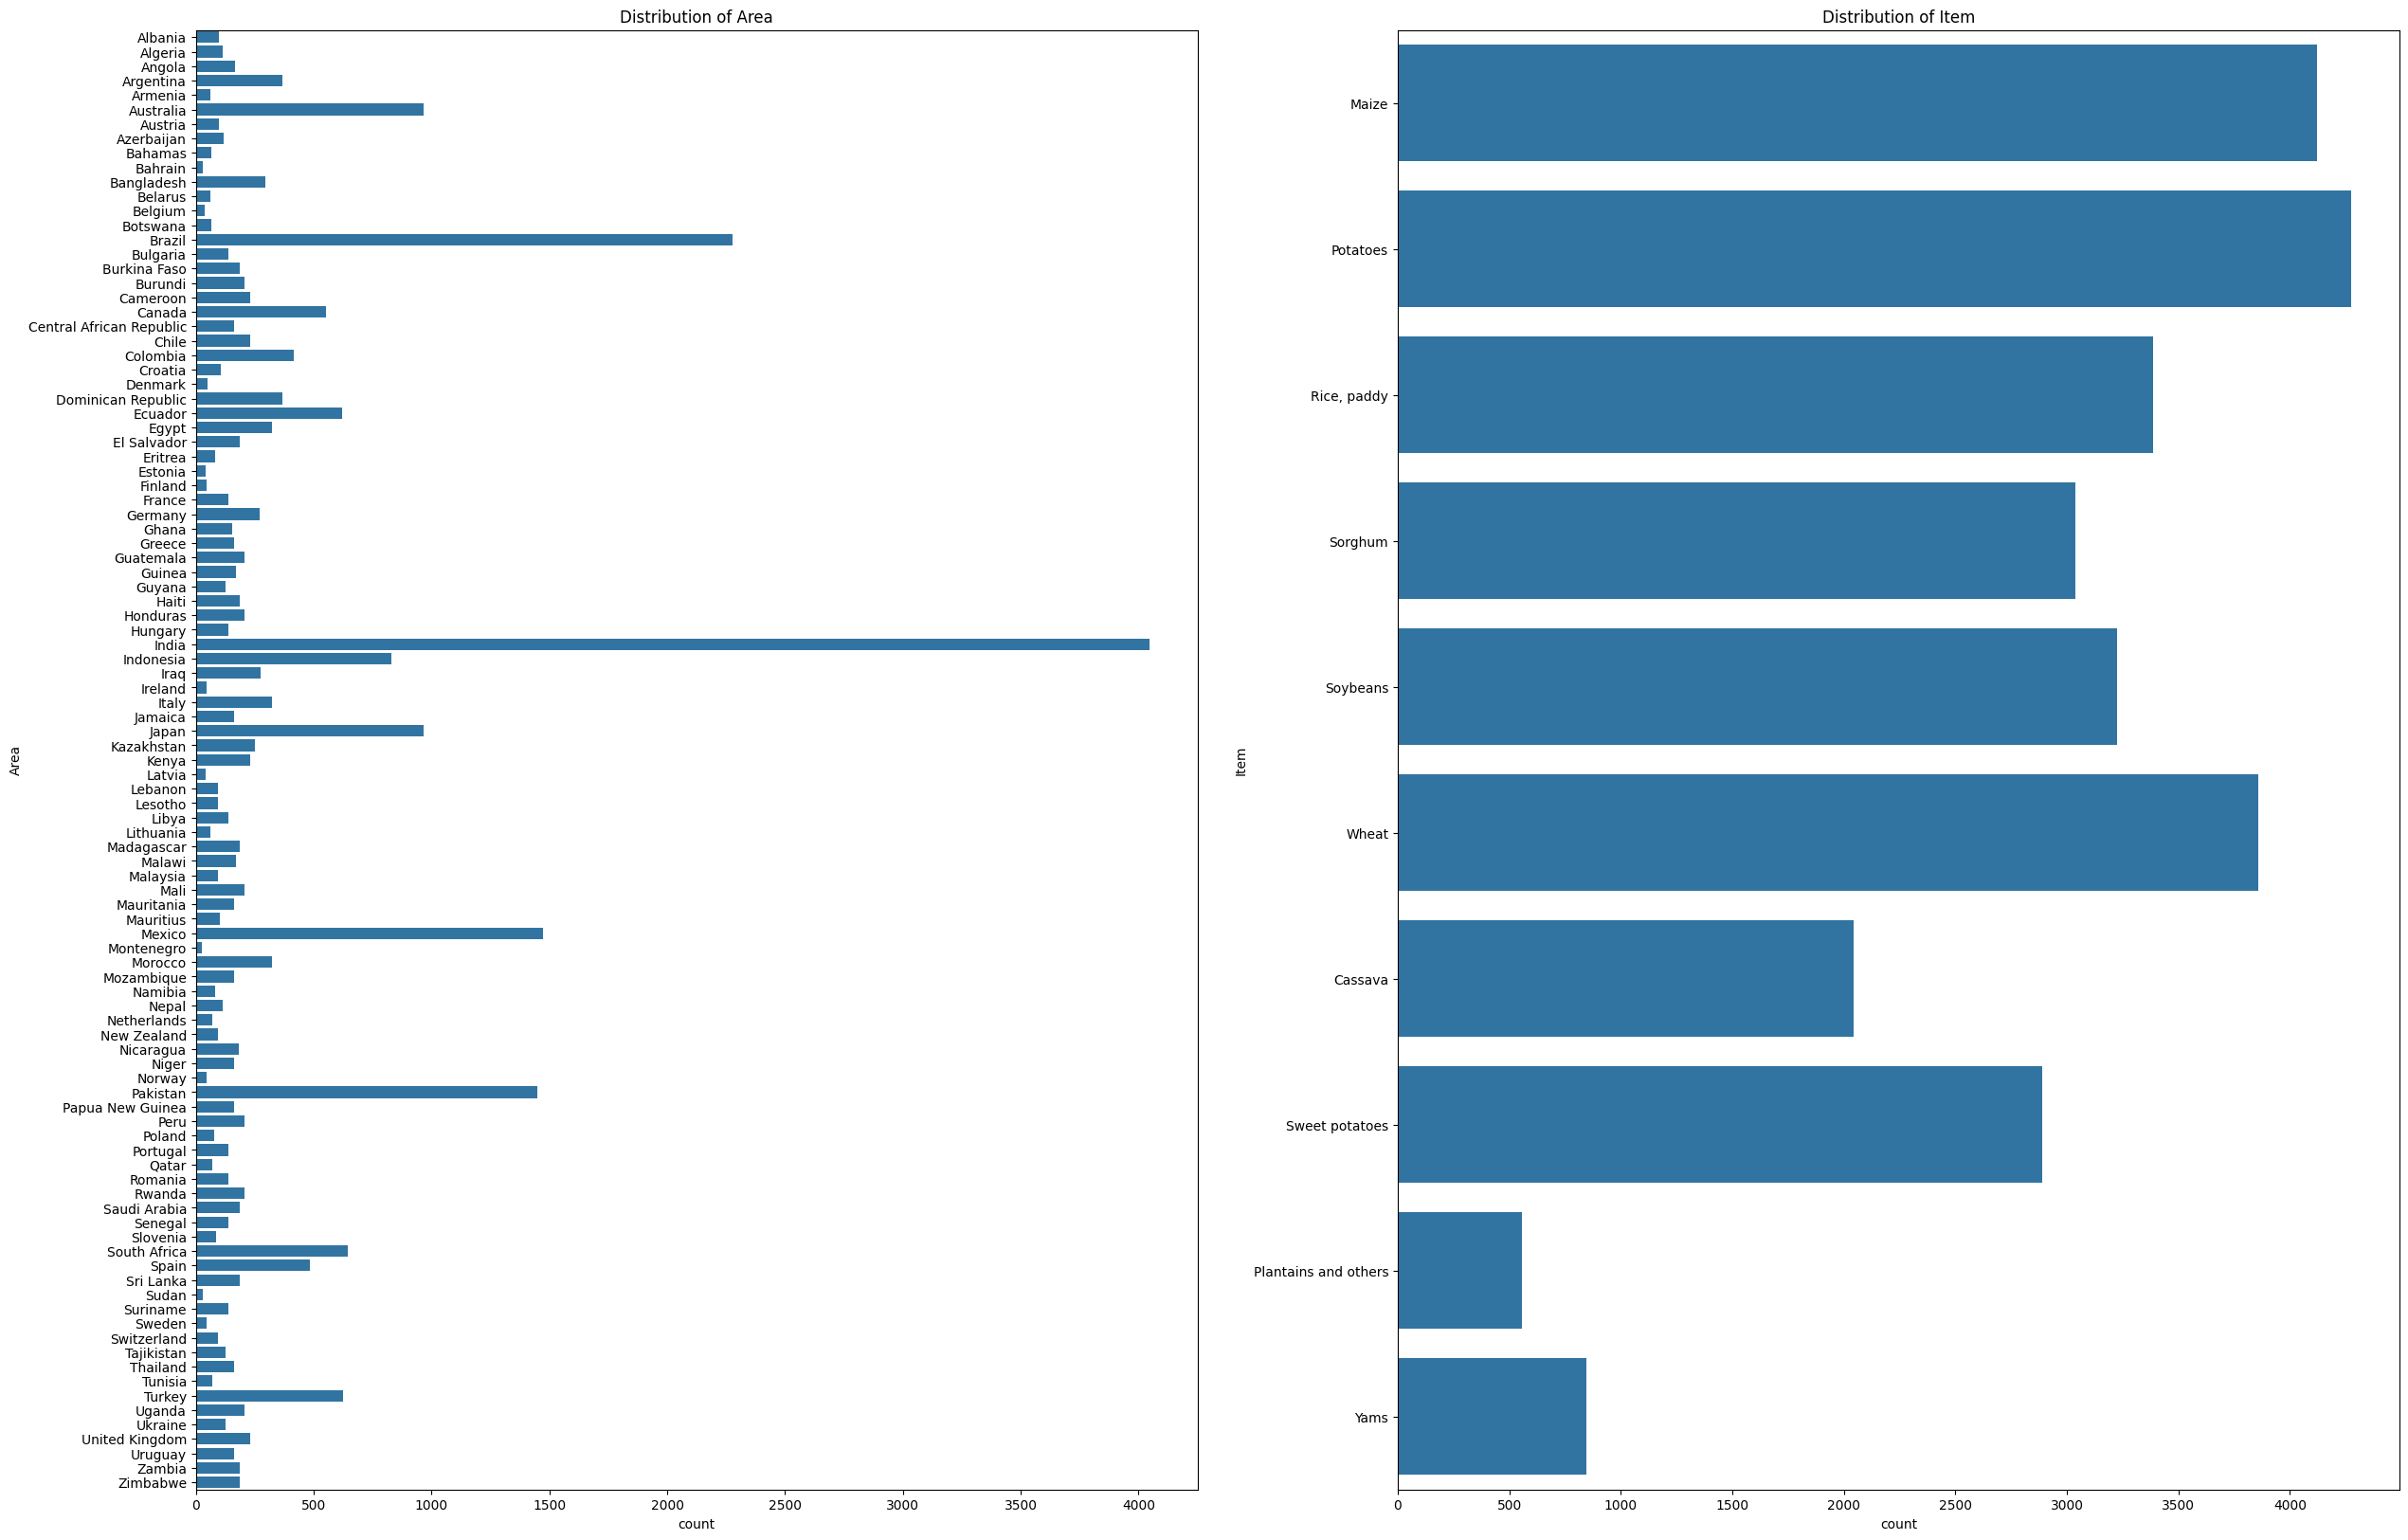

In [41]:
cols = ['Area', 'Item']
fig, axs = plt.subplots(1, 2, figsize=(30, 20))
for idx, col in enumerate(cols):
    sns.countplot(y=col, data=df, ax=axs[idx])
    axs[idx].set_title('Distribution of ' + col)
plt.show()

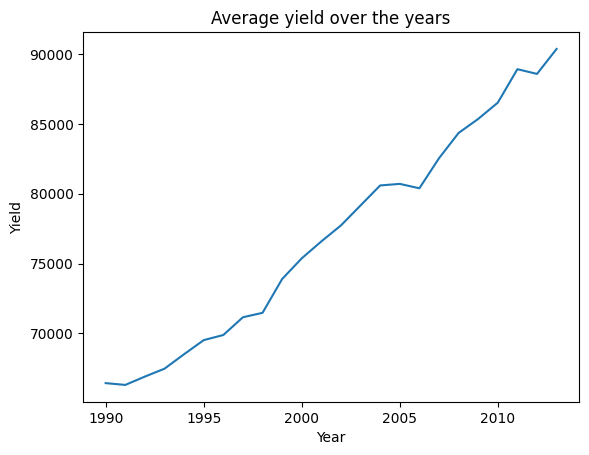

In [42]:
df.groupby(['Year'])['hg/ha_yield'].mean().plot()
plt.title('Average yield over the years')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.show()

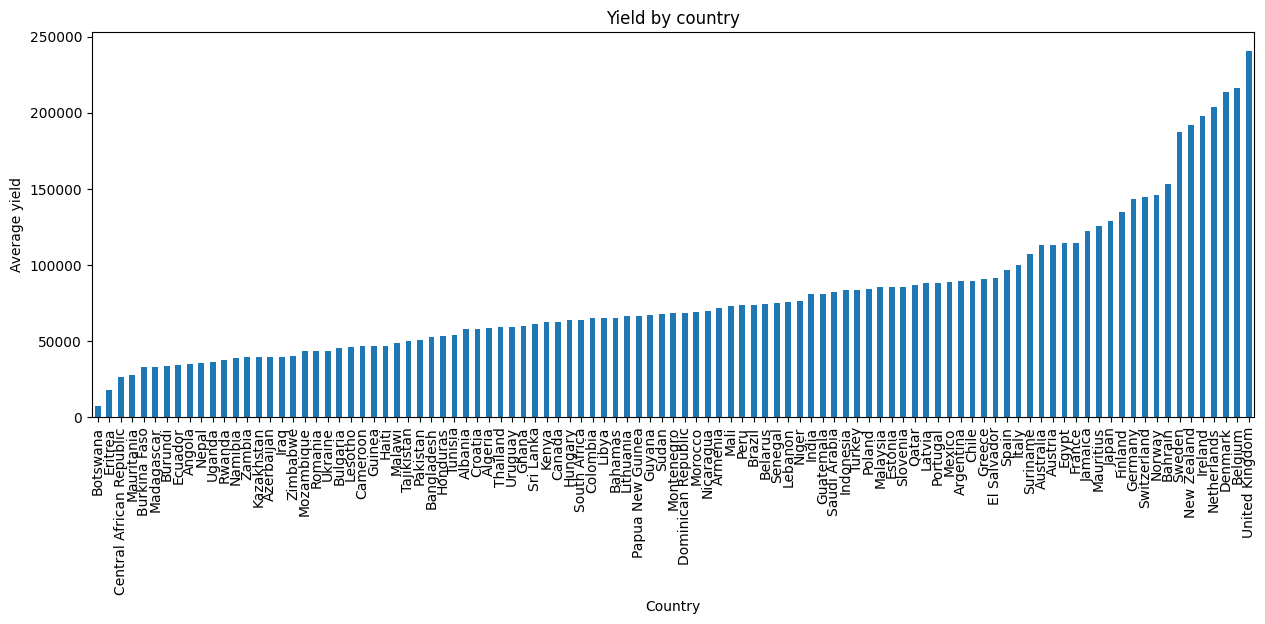

In [43]:
df.groupby('Area')[
    'hg/ha_yield'].mean().sort_values().plot(kind='bar', figsize=(15, 5))
plt.title('Yield by country')
plt.xlabel('Country')
plt.ylabel('Average yield')
plt.show()

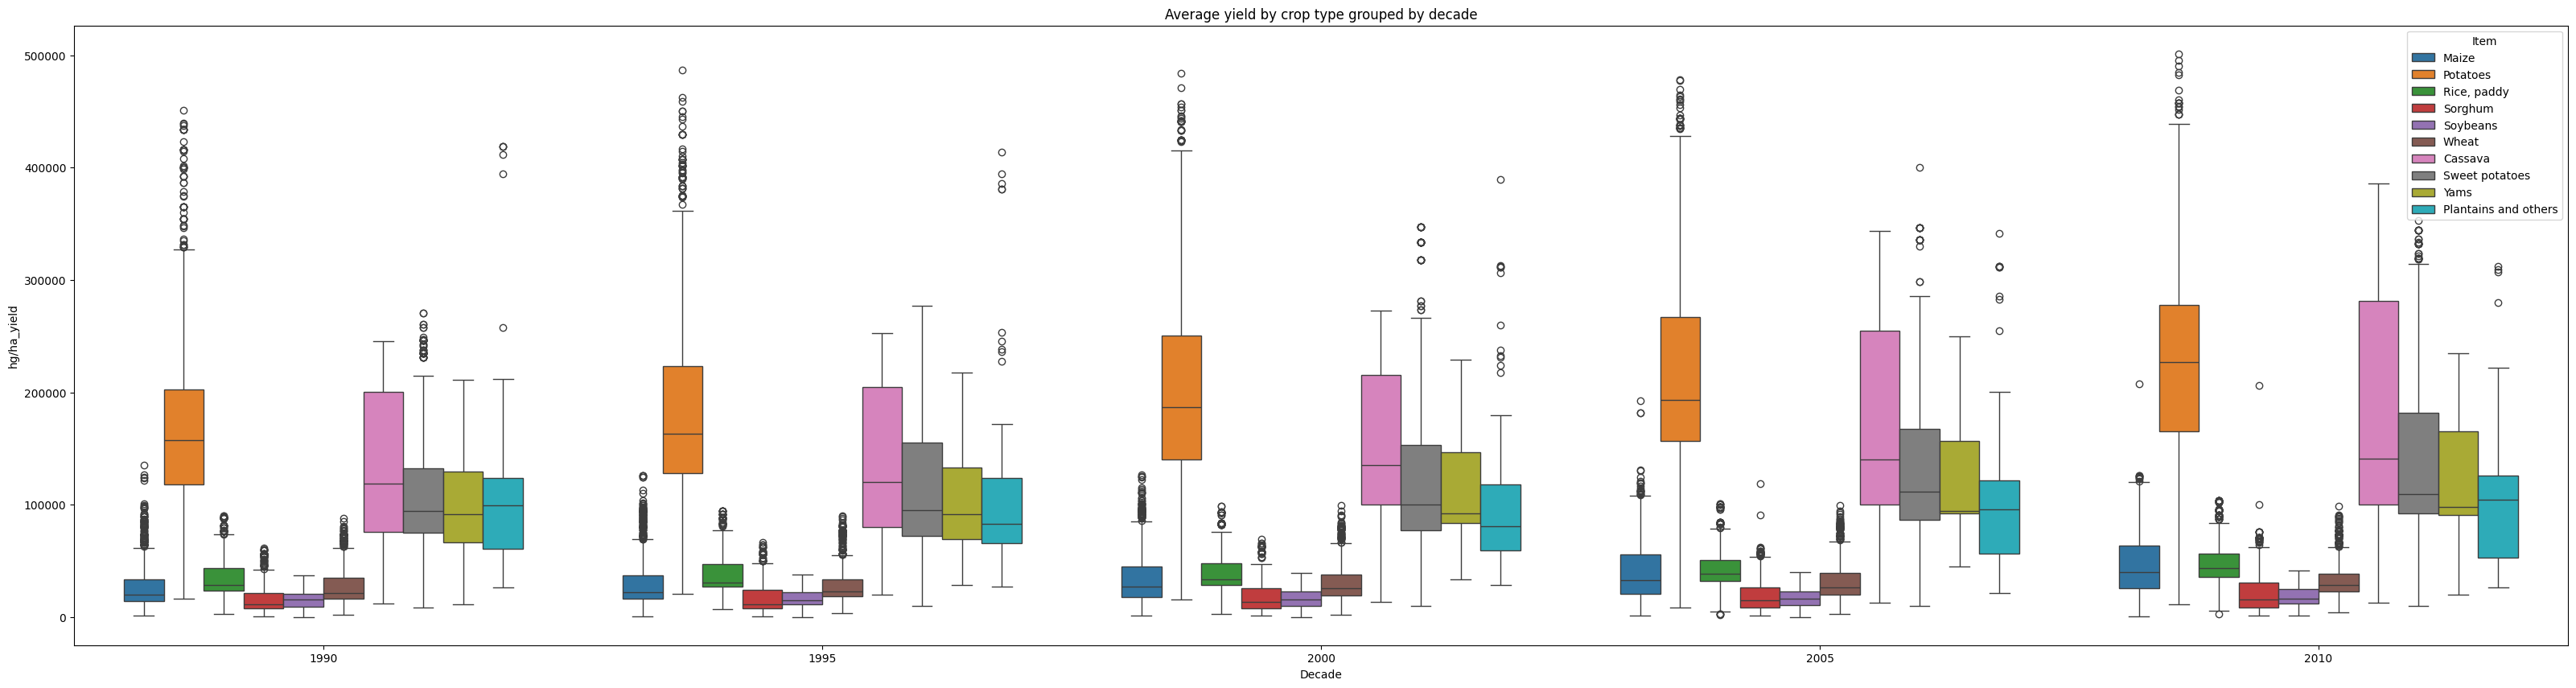

In [44]:
plt.figure(figsize=(40, 10))
df['Decade'] = df['Year'].apply(lambda x: int(x/5)*5)
sns.boxplot(data=df, x='Decade', y='hg/ha_yield', hue='Item')
plt.title('Average yield by crop type grouped by decade')
plt.show()

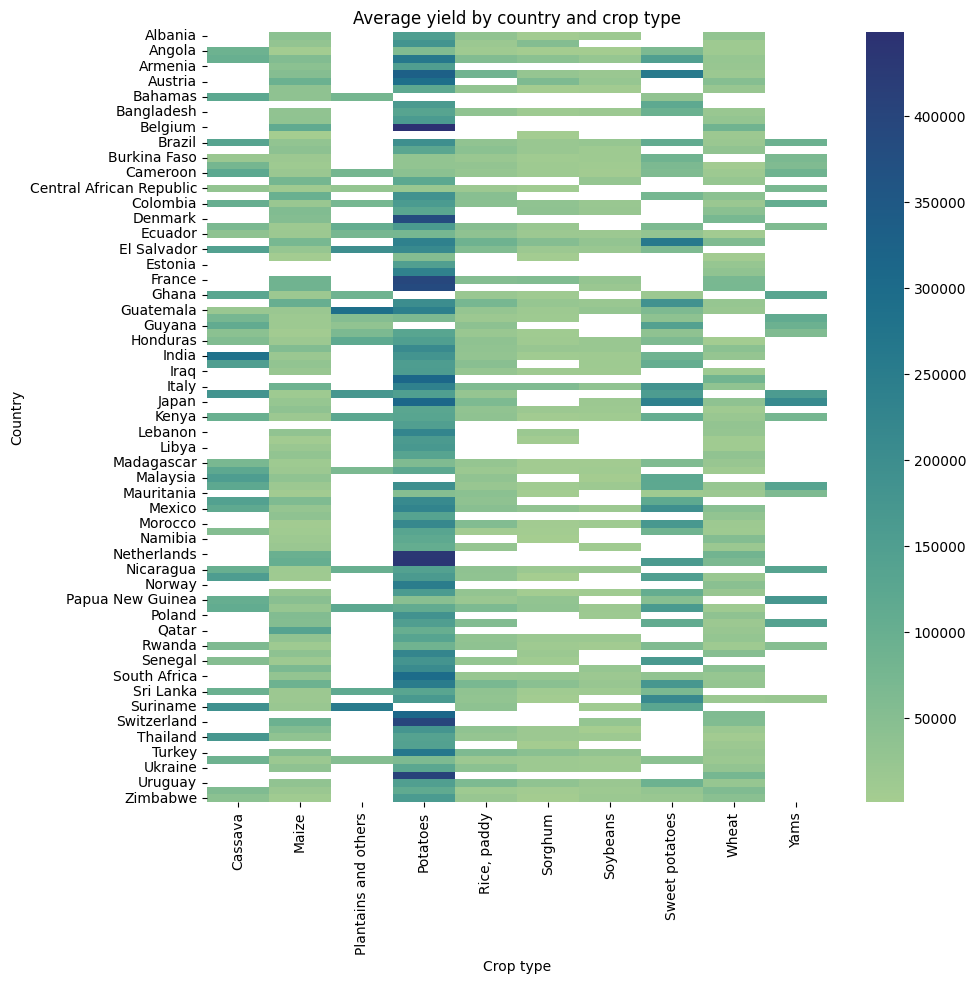

In [45]:
pivot_country_item = df.pivot_table(
    values='hg/ha_yield', index='Area', columns='Item', aggfunc='mean')
plt.figure(figsize=(10, 10))
sns.heatmap(pivot_country_item, annot=False, cmap='crest')
plt.title('Average yield by country and crop type')
plt.xlabel('Crop type')
plt.ylabel('Country')
plt.show()

Regarding the `Area` variable, we see that there are **countries that appear with much more frequency** than others while for the `Item` variable we see **more homogeneity** in references to crop items.


We see **positive correlation** between **time** and **yield** and also some correlation between country and yield, as **some countries have higher yields than others**.  
Boxplots also show highlight that information, and identify some **outliers** that maybe will require to be treated. The boxplots also show the fact that **different crop types have different yield**.  
We can see again in then heatmap that some items (_potatoes_) have higher yield overall, across various countries and that crop items are not cultivated everyhwere.

---
### Correlation analysis

In [46]:
grouped_crops = df.groupby('Item')
correlation_by_crop = grouped_crops[['average_rain_fall_mm_per_year',
                                     'avg_temp', 'pesticides_tonnes', 'hg/ha_yield']].corr().round(3)
correlation_by_crop

average_rain_fall_mm_per_year  \
Item                                                                                
Cassava              average_rain_fall_mm_per_year                          1.000   
                     avg_temp                                               0.182   
                     pesticides_tonnes                                      0.021   
                     hg/ha_yield                                           -0.193   
Maize                average_rain_fall_mm_per_year                          1.000   
                     avg_temp                                               0.333   
                     pesticides_tonnes                                      0.164   
                     hg/ha_yield                                           -0.179   
Plantains and others average_rain_fall_mm_per_year                          1.000   
                     avg_temp                                               0.136   
                     pesticides_tonnes                                      0.616   
                     hg/ha_yield                                            0.056   
Potatoes             average_rain_fall_mm_per_year                          1.000   
                     avg_temp                                               0.281   
                     pesticides_tonnes                                      0.191   
                     hg/ha_yield                                           -0.125   
Rice, paddy          average_rain_fall_mm_per_year                          1.000   
                     avg_temp                                               0.345   
                     pesticides_tonnes                                      0.139   
                     hg/ha_yield                                           -0.133   
Sorghum              average_rain_fall_mm_per_year                          1.000   
                     avg_temp                                               0.298   
                     pesticides_tonnes                                      0.270   
                     hg/ha_yield                                           -0.029   
Soybeans             average_rain_fall_mm_per_year                          1.000   
                     avg_temp                                               0.383   
                     pesticides_tonnes                                      0.179   
                     hg/ha_yield                                           -0.026   
Sweet potatoes       average_rain_fall_mm_per_year                          1.000   
                     avg_temp                                               0.210   
                     pesticides_tonnes                                      0.110   
                     hg/ha_yield                                           -0.223   
Wheat                average_rain_fall_mm_per_year                          1.000   
                     avg_temp                                               0.165   
                     pesticides_tonnes                                      0.340   
                     hg/ha_yield                                           -0.068   
Yams                 average_rain_fall_mm_per_year                          1.000   
                     avg_temp                                               0.033   
                     pesticides_tonnes                                      0.175   
                     hg/ha_yield                                            0.207   

                                                    avg_temp  \
Item                                                           
Cassava              average_rain_fall_mm_per_year     0.182   
                     avg_temp                          1.000   
                     pesticides_tonnes                -0.152   
                     hg/ha_yield                       0.354   
Maize                average_rain_fall_mm_per_year     0.333   
                     avg_temp    

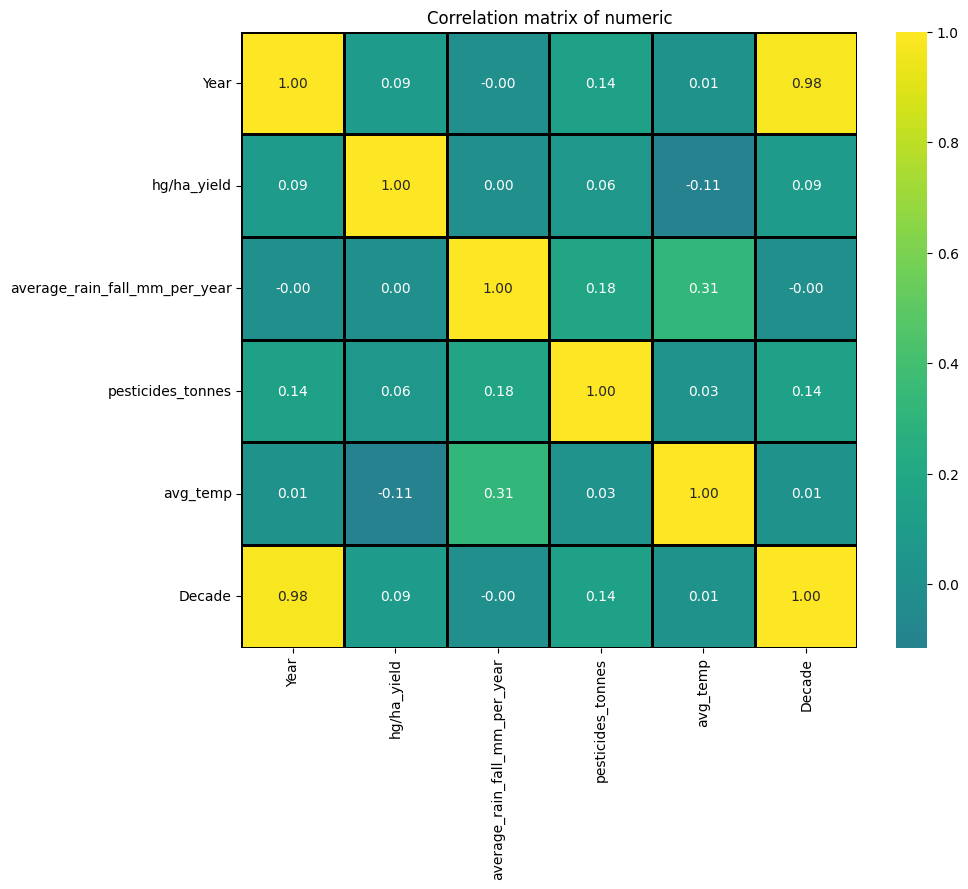

In [47]:
df_corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, center=0, linewidths=2,
            linecolor='black', square=True, fmt='.2f', cmap='viridis')
plt.title('Correlation matrix of numeric')
plt.show()

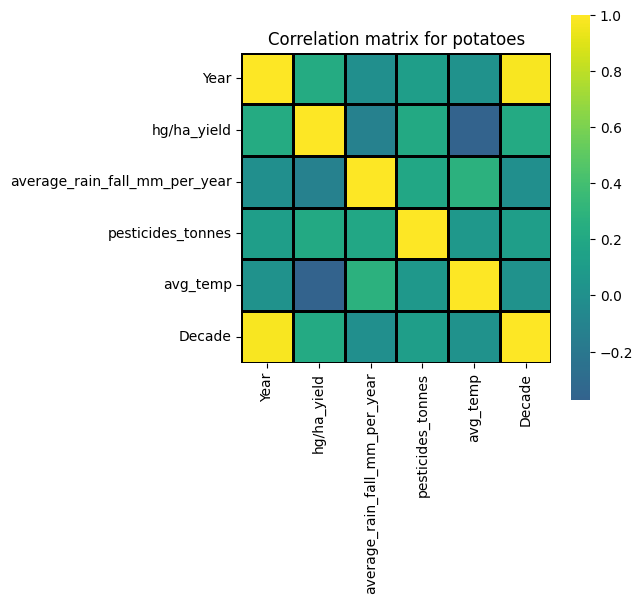

In [48]:
potatoes = grouped_crops.get_group('Potatoes')
potatoes_corr = potatoes.corr(numeric_only=True)
plt.figure(figsize=(5, 5))
sns.heatmap(potatoes_corr, center=0, linewidths=2,
            linecolor='black', square=True, fmt='.2f', cmap='viridis')
plt.title('Correlation matrix for potatoes')
plt.show()

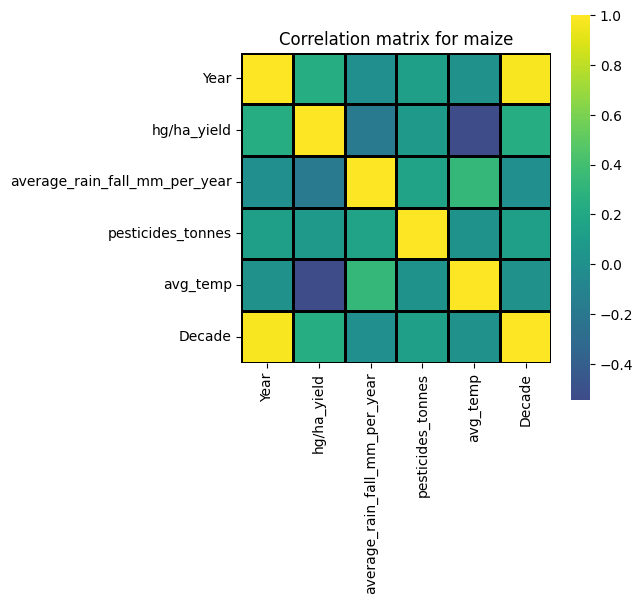

In [49]:
maize = grouped_crops.get_group('Maize')
maize_corr = maize.corr(numeric_only=True)
plt.figure(figsize=(5, 5))
sns.heatmap(maize_corr, center=0, linewidths=2,
            linecolor='black', square=True, fmt='.2f', cmap='viridis')
plt.title('Correlation matrix for maize')
plt.show()

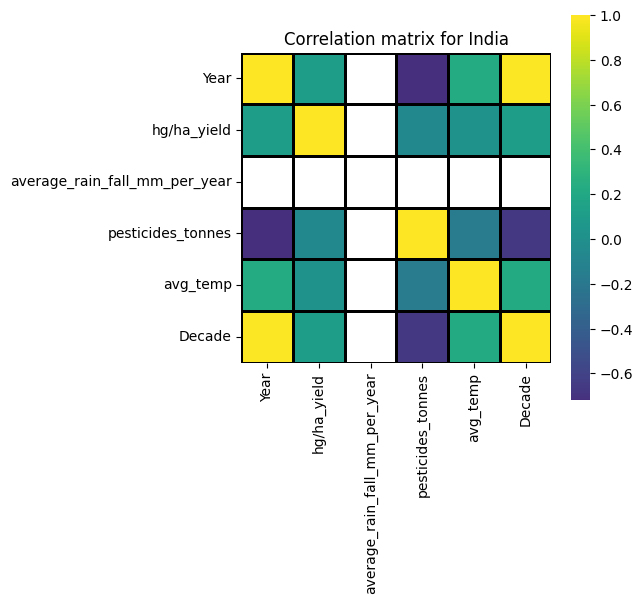

In [50]:
india = df.loc[df['Area'] == 'India']
india_corr = india.corr(numeric_only=True)
plt.figure(figsize=(5, 5))
sns.heatmap(india_corr, center=0, linewidths=2,
            linecolor='black', square=True, fmt='.2f', cmap='viridis')
plt.title('Correlation matrix for India')
plt.show()

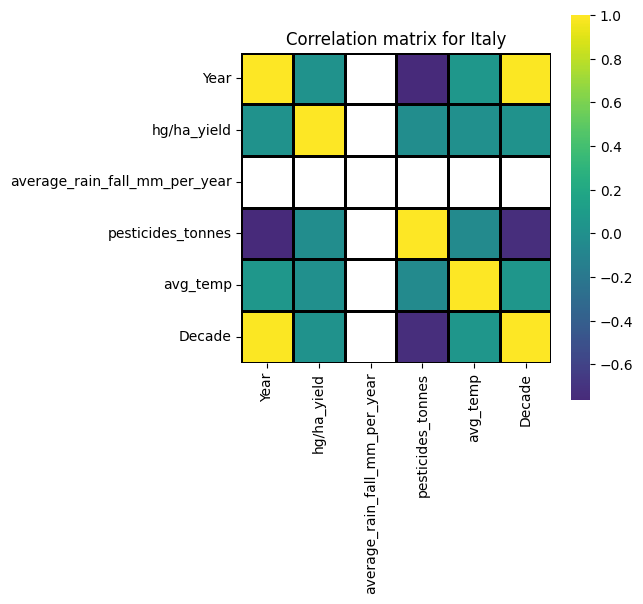

In [19]:
italy = df.loc[df['Area'] == 'Italy']
italy_corr = italy.corr(numeric_only=True)
plt.figure(figsize=(5, 5))
sns.heatmap(italy_corr, center=0, linewidths=2,
            linecolor='black', square=True, fmt='.2f', cmap='viridis')
plt.title('Correlation matrix for Italy')
plt.show()

We can observe that there are crop items for which **yield is more and less correlated to weather** phenomenons. Also **pesticide use** shows stronger and weaker correlation to yield depending on the crop item.  
Averaging among crop types, year and nation we see no actual correlation between any of the numerical variables and yield. As we can see from the previous two heatmaps, **yield isn't strongly correlated** to any of the other values.

---
### Check for data quality issues

In [31]:
df.duplicated().sum()

np.int64(2310)

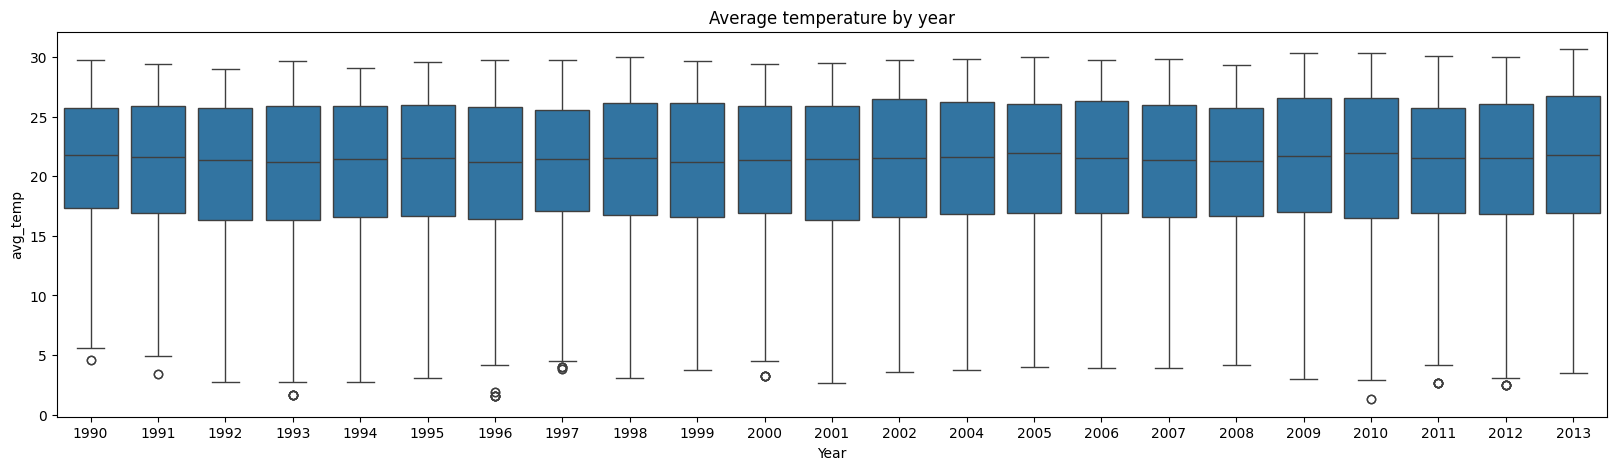

In [32]:
plt.figure(figsize=(20, 5))
sns.boxplot(df, x='Year', y='avg_temp')
plt.title('Average temperature by year')
plt.show()

We can observe 2310 duplicated rows. As the dataset has roughly 28000 rows we can drop these without expecting significant drop of efficiency.

As for numerical columns, we can ignore the outliers in the `pesticides_tonnes` column as we will drop it: the model will not take into account pesticide use as the application won't ask the user whether pesticides will be used on the fields, also to discourage excessive use of pesticides.  
For outliers in `avg_temp` we don't really need to worry as they could represent some extremely cold or hot year respect to the average, but don't present data significantly outised the '_normal_' range (_for some countries at least_).

---
### Yield analysis
As the `hg/ha_yield` variable is numeric, it is not possible to scale it, since it is needed in prediction. Anyway there are some outliers for yield, mostly for unusual high values respect to the data present in the dataset. These are more frequent for the crop types '**Potatoes**', '**Wheat**' and '**Maize**' and could skew predictions towards higher values than reality.

---
## Conclusions
Overall the dataset needs minimal preprocessing:
- scaling of the numerical values
- conversion of categorical variables into numerical ones
- removal of 'undesired' columns: `Year` and `pesticides_tonnes`.